In [51]:
import pandas as pd
import numpy as np

In [53]:
df = pd.read_csv("iris_synthetic_data.csv")
df.sample(5)

,sepal length,sepal width,petal length,petal width,label
807,4.8,3.4,1.8,0.2,Iris-setosa
2254,6.0,2.6,5.3,1.6,Iris-virginica
2694,6.4,2.8,5.7,2.1,Iris-virginica
1475,6.7,3.1,4.6,1.5,Iris-versicolor
2760,6.3,3.1,5.3,1.8,Iris-virginica


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  3000 non-null   float64
 1   sepal width   3000 non-null   float64
 2   petal length  3000 non-null   float64
 3   petal width   3000 non-null   float64
 4   label         3000 non-null   object 
dtypes: float64(4), object(1)
memory usage: 117.3+ KB


In [57]:
df.describe()

,sepal length,sepal width,petal length,petal width
count,3000.000000,3000.000000,3000.000000,3000.000000
mean,5.865267,3.051833,3.767367,1.191000
std,0.805073,0.412472,1.751183,0.758022
min,4.300000,2.000000,0.900000,0.100000
25%,5.100000,2.800000,1.500000,0.300000
50%,5.800000,3.000000,4.300000,1.300000
75%,6.400000,3.300000,5.200000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [59]:
df.isnull().sum()

sepal length    0
sepal width     0
petal length    0
petal width     0
label           0
dtype: int64

In [61]:
X = df.iloc[:,:-1]
X

,sepal length,sepal width,petal length,petal width
0,5.2,3.8,1.5,0.3
1,5.3,4.1,1.5,0.1
2,4.8,3.1,1.5,0.2
3,5.2,3.7,1.5,0.2
4,4.9,3.0,1.5,0.3
...,...,...,...,...
2995,7.2,3.6,6.0,2.5
2996,7.3,3.0,6.2,2.1
2997,6.9,3.2,5.7,2.3
2998,7.5,2.8,6.0,2.0


In [63]:
y = df.iloc[:,-1]
y

0          Iris-setosa
1          Iris-setosa
2          Iris-setosa
3          Iris-setosa
4          Iris-setosa
             ...      
2995    Iris-virginica
2996    Iris-virginica
2997    Iris-virginica
2998    Iris-virginica
2999    Iris-virginica
Name: label, Length: 3000, dtype: object

In [65]:
label_to_index = {label: idx for idx, label in enumerate(np.unique(y))}
index_to_label = { idx: label for label, idx in label_to_index.items()}

y = np.array([label_to_index[label] for label in y])
num_classes = len(label_to_index)

In [67]:
def one_hot_encoding(y, num_classes):
    one_hot_labels = np.zeros((y.size, num_classes))
    one_hot_labels[np.arange(y.size),y]=1
    return one_hot_labels

y_encoded = one_hot_encoding(y, num_classes)
y_encoded

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]])

In [69]:
from sklearn.model_selection import train_test_split 
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y_encoded, test_size=0.15, random_state=42, stratify=y_encoded)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1764, random_state=42, stratify=y_train_val )

In [71]:
X_train, y_train

(      sepal length  sepal width  petal length  petal width
 273            5.1          3.6           1.5          0.4
 2752           6.3          3.0           5.5          1.8
 2100           6.9          3.2           5.7          2.3
 1909           5.0          2.3           3.4          1.0
 546            4.8          3.0           1.3          0.1
 ...            ...          ...           ...          ...
 1620           6.0          2.3           4.3          1.3
 974            4.5          2.9           1.5          0.2
 2738           6.8          3.1           5.5          2.1
 562            5.1          3.8           1.5          0.3
 519            4.8          3.1           1.6          0.2
 
 [2100 rows x 4 columns],
 array([[1., 0., 0.],
        [0., 0., 1.],
        [0., 0., 1.],
        ...,
        [0., 0., 1.],
        [1., 0., 0.],
        [1., 0., 0.]]))

In [73]:
X_val, y_val

(      sepal length  sepal width  petal length  petal width
 541            5.1          3.8           1.6          0.4
 465            5.1          3.5           1.5          0.4
 1484           5.7          3.0           3.9          1.3
 1344           5.8          3.0           4.5          1.5
 317            5.3          3.7           1.5          0.2
 ...            ...          ...           ...          ...
 1956           6.2          2.9           4.6          1.4
 277            4.6          3.1           1.5          0.2
 1161           5.8          2.6           3.9          1.1
 2656           5.8          2.8           5.2          2.4
 1116           6.3          3.3           4.6          1.6
 
 [450 rows x 4 columns],
 array([[1., 0., 0.],
        [1., 0., 0.],
        [0., 1., 0.],
        ...,
        [0., 1., 0.],
        [0., 0., 1.],
        [0., 1., 0.]]))

In [75]:
X_test, y_test

(      sepal length  sepal width  petal length  petal width
 2214           6.6          3.0           5.7          2.2
 885            5.1          3.3           1.6          0.4
 2337           7.2          3.0           6.0          1.7
 1827           4.9          2.4           3.2          1.0
 310            5.1          3.3           1.6          0.4
 ...            ...          ...           ...          ...
 1014           5.3          2.7           3.9          1.4
 918            5.0          3.4           1.5          0.2
 1323           5.7          2.9           4.3          1.4
 1390           5.6          2.5           3.9          1.1
 215            4.6          3.2           1.5          0.2
 
 [450 rows x 4 columns],
 array([[0., 0., 1.],
        [1., 0., 0.],
        [0., 0., 1.],
        ...,
        [0., 1., 0.],
        [0., 1., 0.],
        [1., 0., 0.]]))

In [77]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)
X_train, X_val, X_test

(array([[-0.95015346,  1.31798403, -1.29388981, -1.04245304],
        [ 0.53870783, -0.12256062,  0.99194228,  0.80582337],
        [ 1.28313847,  0.35762093,  1.10623388,  1.46592209],
        ...,
        [ 1.1590667 ,  0.11753015,  0.99194228,  1.2018826 ],
        [-0.95015346,  1.79816558, -1.29388981, -1.17447279],
        [-1.32236879,  0.11753015, -1.23674401, -1.30649253]]),
 array([[-0.95015346,  1.79816558, -1.23674401, -1.04245304],
        [-0.95015346,  1.07789325, -1.29388981, -1.04245304],
        [-0.20572282, -0.12256062,  0.07760944,  0.14572465],
        ...,
        [-0.08165104, -1.08292373,  0.07760944, -0.11831484],
        [-0.08165104, -0.60274218,  0.82050487,  1.59794183],
        [ 0.53870783,  0.5977117 ,  0.47763006,  0.54178388]]),
 array([[ 0.91092315, -0.12256062,  1.10623388,  1.33390235],
        [-0.95015346,  0.5977117 , -1.23674401, -1.04245304],
        [ 1.6553538 , -0.12256062,  1.27767129,  0.67380363],
        ...,
        [-0.20572282, -0.36

In [105]:
class multi_class_classification:
    def __init__(self, learning_rate = 0.01, n_iteration = 5000, beta = 0.99, epsilon = 1e-10):
        self.learning_rate = learning_rate
        self.n_iteration = n_iteration
        self.beta = beta 
        self.epsilon = epsilon
        self.weights = None
        self.bias = None
        self.losses = []
        self.v_dw = None
        self.v_db = None

    def softmax(self, z):
        exp_z = np.exp(z-np.max(z, axis = 1, keepdims = True))
        return exp_z/np.sum(exp_z, axis = 1, keepdims = True)

    def compute_cost(self, y, y_hat):
        loss = -np.sum(y*np.log(y_hat + self.epsilon))/y.shape[0]
        return loss
        
    def update_params_rms_prop(self, dw, db):
        self.v_dw = self.beta * self.v_dw + (1-self.beta) * (dw ** 2)
        self.v_db = self.beta * self.v_db + (1-self.beta) * (db ** 2)

        self.weights -= (self.learning_rate * dw )/(np.sqrt(self.v_dw + self.epsilon))
        self.bias -= (self.learning_rate * db )/(np.sqrt(self.v_db + self.epsilon))
        
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.n_classes = y.shape[1]

        self.weights = np.zeros((n_features, self.n_classes))
        self.bias = np.zeros((1, self.n_classes))

        self.v_dw = np.zeros((n_features, self.n_classes))
        self.v_db = np.zeros((1, self.n_classes))

        for i in range(self.n_iteration):
            f_wb = np.dot(X, self.weights)+self.bias
            y_hat = self.softmax(f_wb)

            dw = (1/n_samples) * np.dot(X.T, (y_hat - y))
            db = (1/n_samples) * np.sum(y_hat - y, axis=0, keepdims=True)

            loss = self.compute_cost(y, y_hat)
            self.losses.append(loss)

            self.update_params_rms_prop(dw,db)

    def predict_proba(self, X):
        f_wb = np.dot(X, self.weights)+self.bias
        return self.softmax(f_wb)

    def predict(self, X):
        proba = self.predict_proba(X)
        return np.argmax(proba, axis = 1)

In [107]:
model = multi_class_classification()
model.fit(X_train, y_train)

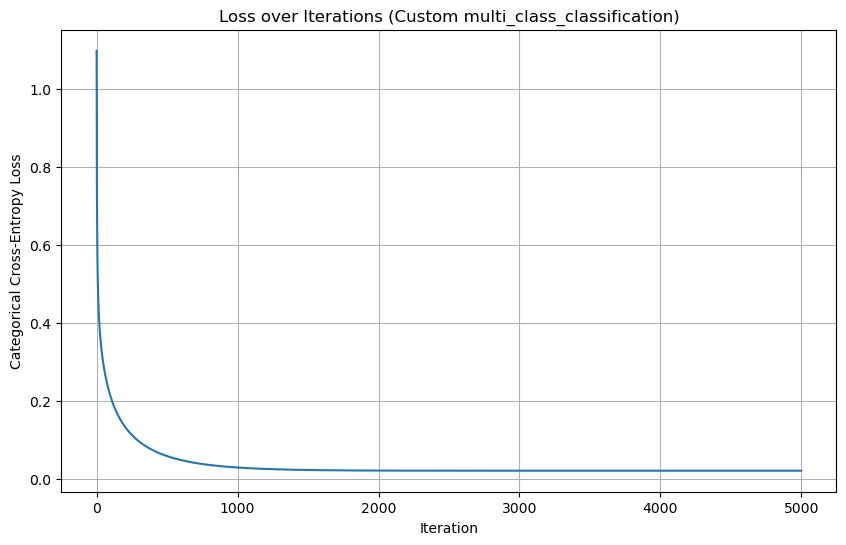

In [108]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(model.losses)
plt.title('Loss over Iterations (Custom multi_class_classification)')
plt.xlabel('Iteration')
plt.xticks()
plt.ylabel('Categorical Cross-Entropy Loss')
plt.grid(True)
plt.show()

Evaluation using Cross-Validation Set
Validation Accuracy (Custom multi_class_classification): 0.9933

Classification Report (Custom multi_class_classification on Validation Set):
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00       150
Iris-versicolor       0.99      0.99      0.99       150
 Iris-virginica       0.99      0.99      0.99       150

       accuracy                           0.99       450
      macro avg       0.99      0.99      0.99       450
   weighted avg       0.99      0.99      0.99       450



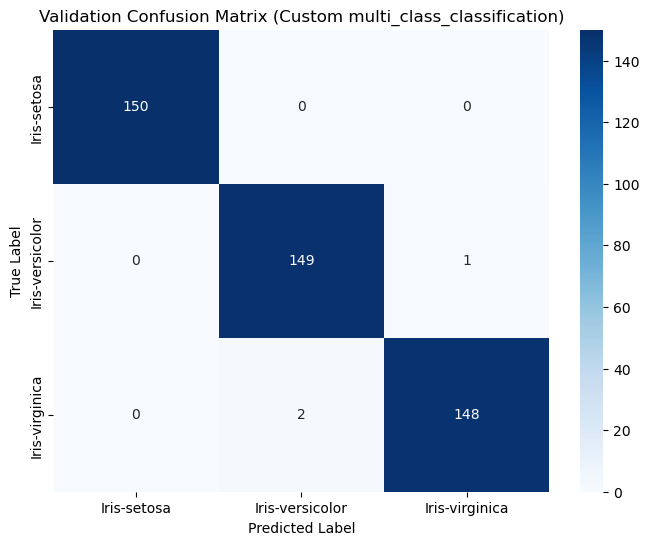

In [111]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

print("Evaluation using Cross-Validation Set")
y_val_pred_custom = model.predict(X_val)

y_val_true_labels = np.argmax(y_val, axis=1)

val_accuracy_custom = accuracy_score(y_val_true_labels, y_val_pred_custom)
print(f"Validation Accuracy (Custom multi_class_classification): {val_accuracy_custom:.4f}")

class_names = [index_to_label[i] for i in sorted(index_to_label.keys())]

print(f"\nClassification Report (Custom multi_class_classification on Validation Set):\n",
      classification_report(y_val_true_labels, y_val_pred_custom, target_names=class_names))

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_val_true_labels, y_val_pred_custom), annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title('Validation Confusion Matrix (Custom multi_class_classification)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Evaluation using Test Set (Custom multi_class_classification)
Test Accuracy (Custom multi_class_classification): 0.9911

Classification Report (Custom multi_class_classification on Test Set):
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00       150
Iris-versicolor       0.99      0.99      0.99       150
 Iris-virginica       0.99      0.99      0.99       150

       accuracy                           0.99       450
      macro avg       0.99      0.99      0.99       450
   weighted avg       0.99      0.99      0.99       450



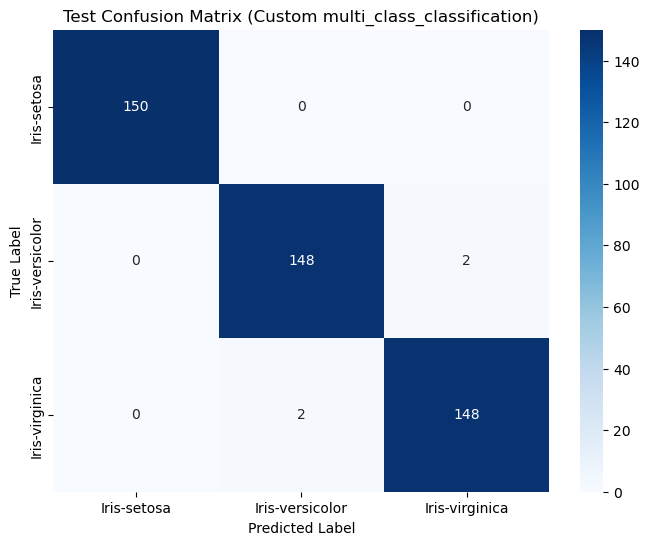

Model Training and Evaluation Complete


In [113]:
print("Evaluation using Test Set (Custom multi_class_classification)")
y_test_pred_custom = model.predict(X_test)
y_test_true_labels = np.argmax(y_test, axis=1)

test_accuracy_custom = accuracy_score(y_test_true_labels, y_test_pred_custom)
print(f"Test Accuracy (Custom multi_class_classification): {test_accuracy_custom:.4f}")
print(f"\nClassification Report (Custom multi_class_classification on Test Set):\n",
      classification_report(y_test_true_labels, y_test_pred_custom, target_names=class_names))

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test_true_labels, y_test_pred_custom), annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title('Test Confusion Matrix (Custom multi_class_classification)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print("Model Training and Evaluation Complete")